# Multi-test

When testing 10,000 simulations:
- **1 test**: P(Sharpe ≥ 1.8) = 0.0
- **50 tests**: P(Sharpe ≥ 1.8) = 0.0019

This demonstrates that multiple testing significantly increases the probability of observing spurious high Sharpe ratios, even when all strategies are pure noise (null hypothesis is true).

In [26]:
import numpy as np

T = 1260        # days
sigma = 0.01    # daily vol

def sharpe_tstat(r):
    mu = np.mean(r)
    sd = np.std(r, ddof=1)
    sharpe = mu / sd * np.sqrt(252)
    tstat = mu / (sd / np.sqrt(len(r)))
    return sharpe, tstat

def max_stat_under_null(N):
    sharpes = []
    tstats = []
    for _ in range(N):
        r = np.random.normal(0, sigma, T)
        s, t = sharpe_tstat(r)
        sharpes.append(s)
        tstats.append(t)
        
    return np.max(sharpes), np.max(tstats)

In [27]:
M = 10000

max_sharpe_1 = []
max_sharpe_50 = []

for _ in range(M):
    s1, _ = max_stat_under_null(1)
    s50, _ = max_stat_under_null(50)
    max_sharpe_1.append(s1)
    max_sharpe_50.append(s50)

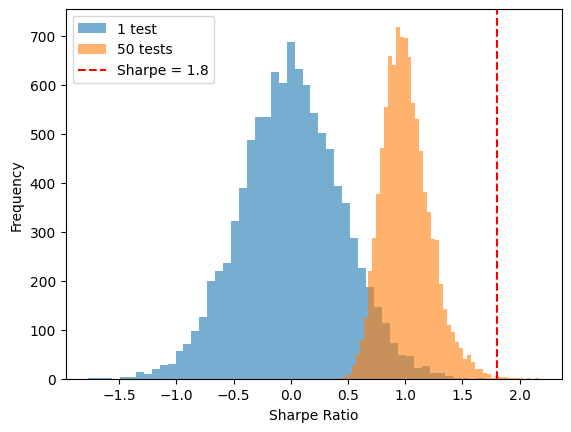

P(Sharpe ≥ 1.8 | 1 test):  0.0
P(Sharpe ≥ 1.8 | 50 tests): 0.0017


In [28]:
import matplotlib.pyplot as plt

plt.hist(max_sharpe_1, bins=50, alpha=0.6, label="1 test")
plt.hist(max_sharpe_50, bins=50, alpha=0.6, label="50 tests")
plt.axvline(1.8, color="red", linestyle="--", label="Sharpe = 1.8")
plt.legend()
plt.xlabel("Sharpe Ratio")
plt.ylabel("Frequency")
plt.show()

print("P(Sharpe ≥ 1.8 | 1 test): ",
      np.mean(np.array(max_sharpe_1) >= 1.8))

print("P(Sharpe ≥ 1.8 | 50 tests):",
      np.mean(np.array(max_sharpe_50) >= 1.8))
